# Final Project for Computational Physics 25000

## Simulation of water droplet evaporation

I have a 2D NxN matrix of molecules for a simplified water droplet model. I will assume the molecules are evaporating from the outer layer inwards. A molecule needs to absorb enough energy to overcome vapor pressure and break its hydrogen bonds to then escape into the surrounding air as a gas. To simplify the system, I am going to ignore vapor pressure and focus on hydrogen bonds. At the beginning of the simulation I will have to input a temperature. Molecules at the edge of a droplet evaporate first, so I will iterate through the cells around the edge of my matrix until they evaporate. I will assume the Maxwell-Boltzmann distribution applies. I will use this distribution to randomly obtain a velocity for my molecule. I will use this velocity to calculate the kinetic energy of my molecule. If the kinetic energy is bigger than the hydrogen bond energy, the molecule breaks free and I remove it from my matrix.

 

Pseudocode:

-       Input temperature

-       Create matrix NxN filled with 1s (to represent a present molecule, 0 for evaporated)

-       Iterate around the cells at the edge

-       Obtain the velocity of this molecule: use rejection sampling to obtain a random velocity from the Maxwell-Boltzmann distribution 

-       Calculate the kinetic energy of the molecule E_k=(1/2)mv^2

-       If (kinetic energy)>(hydrogen bond energy): molecule evaporates => set cell =0

-       Run again

 

 


In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib

In [14]:
#Creates a matrix of 1's to represent water molecules
def createDroplet(N):
    return np.full((N,N),1) #Creating the water droplet matrix

In [15]:
#Returns coordinates for a random molecule in the matrix
def randomMolecule(droplet):
    N,M=np.shape(droplet)

    i=random.randint(0,N-1)
    j=random.randint(0,M-1)
    return i,j

In [16]:
#Returns probability 
def maxwellBoltzmannDistribution(x, T):
    
    k=1.380649*10**(-23) #Boltzmann constant
    m=2.9915*10**(-23)*10**(-3) #mass of a water molecule in kg
    return np.sqrt(2/np.pi)*(m/(k*T))**(3/2)*x**2*np.exp(-m*x**2/(2*k*T))

In [17]:
def getMoleculeVelocity(T):
    
    #Rejection Method for selecting a random number according to a probability distribution
    i=0
    while i<10:
        i+=1
        
        #Find bounding value of PDF (most probable value)
        v_p=np.sqrt(2*8.3144621*T/0.01801528) #v_p=sqrt(2RT/M) where R is gas constant, T is temperature and M is molar mass
        #M (molar mass of H2O)=18.01528e-3 kg/mol, R(gas constant of H20)=8.3144621 J.mol^-1.K^-1
        
        #Find probability of obtaining v_p
        probv_p=maxwellBoltzmannDistribution(v_p,T)

        #Pick an x uniformly in the domain of the PDF (our PDF goes to 0 after 1000)
        x=0+(1000-0)*random.random()

        #Pick a y uniformly between 0 and v_p
        y=probv_p*random.random()

        probx=maxwellBoltzmannDistribution(x,T)

        if y<probx:
            return x
    
    return x

print(getMoleculeVelocity(300)) #Test call

698.3623336538258


In [18]:
#Returns kinetic energy of molecule E_k=(1/2)mv^2
def getKineticEnergy(T):
    
    v=getMoleculeVelocity(T)
    
    m=2.988*10**(-26) #mass of water molecule 2.988e-26 kg
    
    kineticEnergy=(1/2)*m*v**2
    
    return kineticEnergy

print(getKineticEnergy(300)) #Test call

1.980456399392681e-21


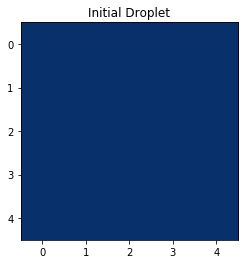

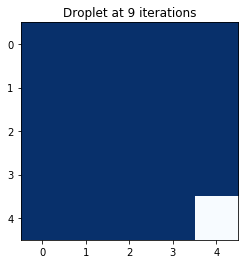

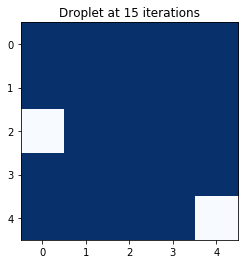

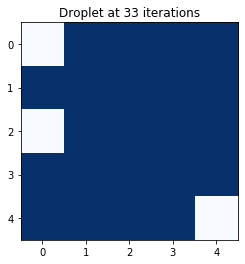

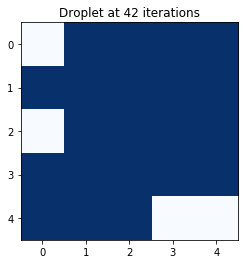

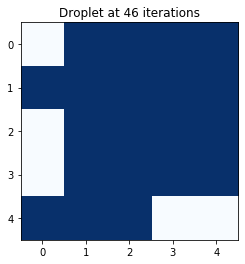

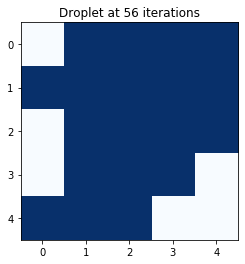

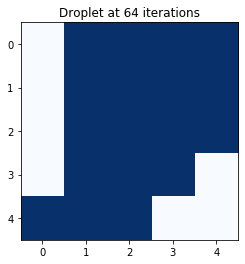

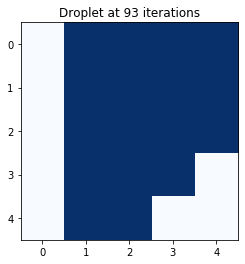

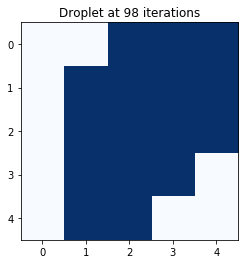

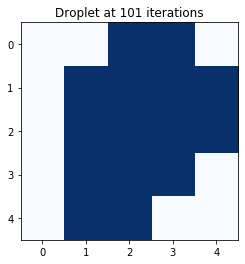

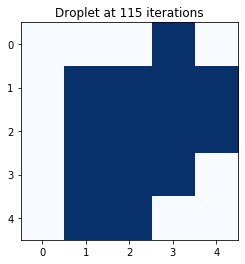

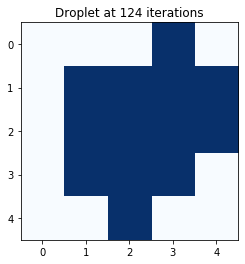

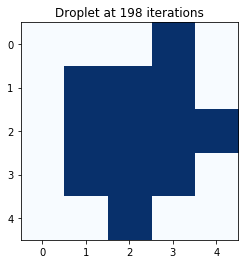

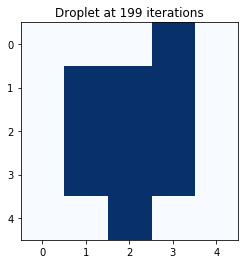

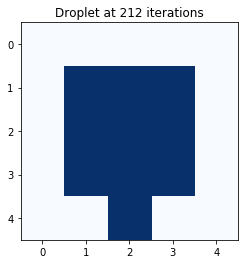

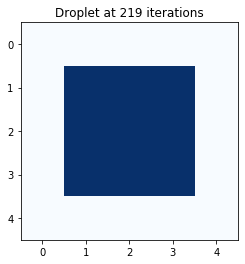

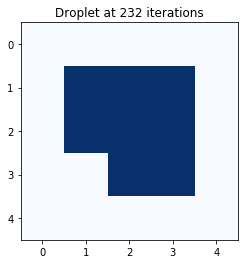

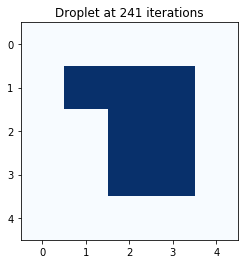

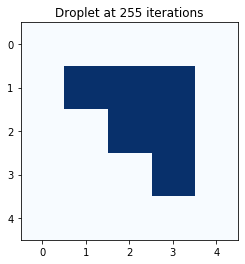

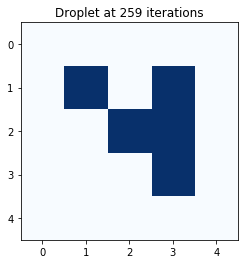

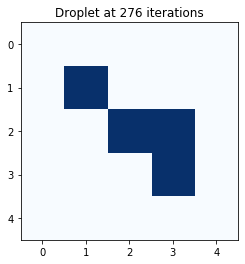

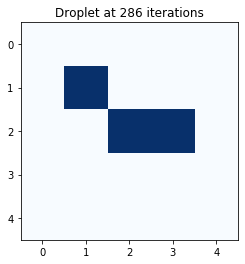

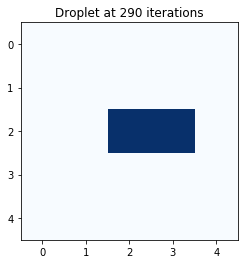

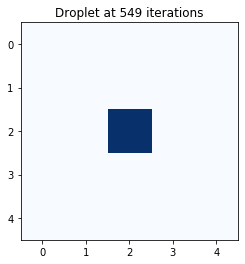

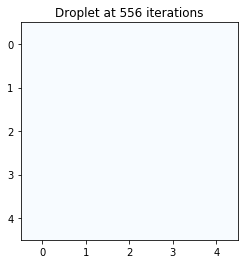

556


<Figure size 432x288 with 0 Axes>

In [25]:
#Create droplet (NxN) matrix with all cells set to 1 to represent present water molecule
#Iterates around the edge of the array until all molecules have evaporated, then moves to next inner layer etc.
#At each cell calculates kinetic energy by randomly sampling a velocity from the Maxwell-Boltzmann distribution
#If kinetic energy of the molecule is larger than the energy of a hydrogen bond, set cell equal to 0 (moleucle has evaporated)
#If kinetic energy of the molecule is smaller than the energy of a hydrogen bond, continue to next cell
#Continues iterating around the edge until all outer edge molecules have evaporated

def evaporate(N,T, visualize=True):
    
    hydrogenBondEnergy=9.9632*10**(-21) #energy of a hydrogen bond for water molecule
    #Energy of a hydrogen bond is 6-30 kJ/mol (≈2-12 kBT), (6000-30 000 J/mol => 9.9632e-21 - 4.9816e-20 J per molecule of H_2O)

    droplet=createDroplet(N) #create initial water droplet (NxN) matrix with all cells set to 1
    
    #Plotting initial water droplet visualization
    if visualize:
        plt.title('Initial Droplet')
        plt.imshow(droplet,cmap='Blues_r')
        plt.savefig('DropletEvaporationPlots/Droplet0.pdf')
        plt.show()

    direction=0 #0 means right, 1 means down, 2 means left, 3 means up
    column=0 #tracks current column position 
    row=0 #tracks current row position
    layer=1 #current layer of droplet we are iterating around
    layer_count=0 #number of molecules that have evaporated in current layer
    counter=0 #number of molecules that have evaporated
    iterations=0 #number of iterations completed

    while (counter<N*N and iterations<5000):#Breaks once all molecules have evaporated or we have exceeded 5000 iterations
        
        iterations+=1
        
        if droplet[row][column]==1: #Runs if molecule has not evaporated
            
            kineticEnergy=getKineticEnergy(T)
            
            if kineticEnergy>hydrogenBondEnergy: #Runs if kinetic energy of molecule is larger than hydrogen bond energy
                
                droplet[row][column]=0 #Molecule has evaporated
                counter+=1 #Update counter for total number of molecules evaporated
                layer_count+=1 #update counter for number of molecules evaporated in current layer
                
                if visualize: #Displays visualization of initial droplet if "visualize" is enabled
                    plt.imshow(droplet,cmap='Blues')
                    plt.title('Droplet at %d iterations' %iterations)
                    plt.savefig('DropletEvaporationPlots/Droplet%d.pdf'%iterations)
                    plt.show()

        if direction==0 and column<(N-layer): #Iterating to the right (direction=0) and check position is not out of bounds for current layer
               
                column+=1 #Update column position
                
                if column == (N-layer): #Time to change directions
                    
                    direction=1 #Now iterating down the right side of the matrix
                    
        elif direction==1 and row<(N-layer): #Iterating down and check position is not out of bounds of current layer
            
                row+=1 #Update row position
                
                if row == (N-layer): #Time to change directions
                    
                    direction=2 #Now iterating to the left (at the bottom of the layer) of the matrix
                    
        elif direction==2 and column>layer-1: #Iterating to the left and check position is not out of bounds of current layer
            
                column-=1 #Update column position
                
                if column == layer-1: #Time to change directions
                    
                    direction=3 #Now iterating up on the left side of the matrix
                    
        elif direction==3 and row>layer-1: #Iterating to up and check position is not out of bounds of current layer
            
                row-=1 #Update row position
                
                if row == layer-1: #Time to change directions
                    
                    direction=0 #Now iterating to the right at the top of the matrix
                    
                    if (N-(2*(layer-1)))*4-4==layer_count: #(N-(2*(layer-1)))*4-4 => number of total molecules in current layer
                        #if all molecues in this layer have evaporated:
                        row+=1 #Update position 
                        layer+=1 #Update layer
                        layer_count=0 #Reset counter for current number of molecules evaporated in current layer
                        
                        
    return iterations #returns number of iterations needed for droplet to completely evaporate

N=5
T=300
print(evaporate(N,T,True))
plt.tight_layout()

#Code continues after the visualizations#

2801.29

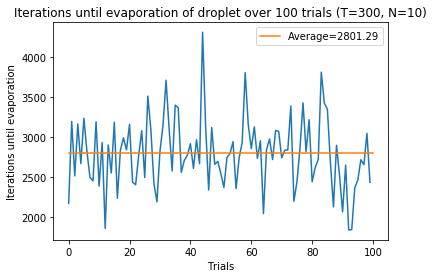

In [20]:
#Plot of iterations needed for evaporation at a set temperature over number of trials and average of all trials

def totalIterations(N,T,trials,Plot=True):
    
    arr=[] #Array for number of iterations needed for evaporation at each trial

    for i in range(trials):
        arr.append(evaporate(N,T,False)) #Add number of iterations needed for evaporation to array
    
    average=sum(arr)/len(arr) #Find the average of the numbers in the array
    
    if Plot: #To visualize the variation over trials
        
        plt.plot(arr)
        plt.title('Iterations until evaporation of droplet over 100 trials (T=%d, N=%d)'%(T,N))
        plt.xlabel('Trials')
        plt.ylabel('Iterations until evaporation')

        x=np.linspace(0,len(arr),len(arr))
        y=np.full(len(arr),average)

        plt.plot(x,y,label='Average='+str(average))
        plt.legend()

        plt.savefig('iterationsvstrials.pdf')
    
    return average #returns the average number of iterations needed for complete evaporation over number of trials
    
    

totalIterations(10,300,100,True) #Test call


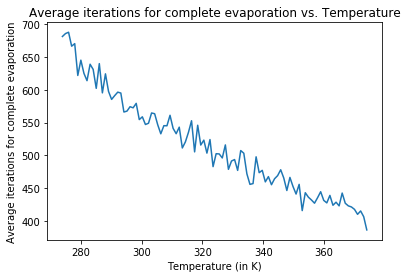

In [22]:
#Plot of average iterations needed for complete evaporation vs. temperature
#Water freezes at 273 K - the temperature range has been thus been set to 274 to 374
#For 5x5 droplet matrix

iteravgarr=[]

for i in range(274,374):
    iteravgarr.append(totalIterations(5,i,100,False))


temps=np.linspace(274,374,100)
plt.plot(temps,iteravgarr)
plt.title('Average iterations for complete evaporation vs. Temperature')
plt.xlabel('Temperature (in K)')
plt.ylabel('Average iterations for complete evaporation')
plt.savefig('avgitervstemp.pdf')

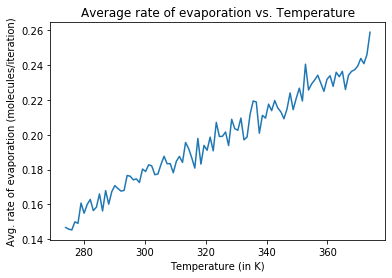

In [24]:
#Plot of average rate of evaporation vs. temperature

plt.plot(temps,np.divide(N*N,iteravgarr)) #Average rate of evaporation = (Number of molecules)/(Number of iterations) 
#(=> gives number of molecules evaporated per iteration)

plt.title('Average rate of evaporation vs. Temperature')
plt.xlabel('Temperature (in K)')
plt.ylabel('Avg. rate of evaporation (molecules/iteration)')
plt.savefig('avgratevtemp.pdf')

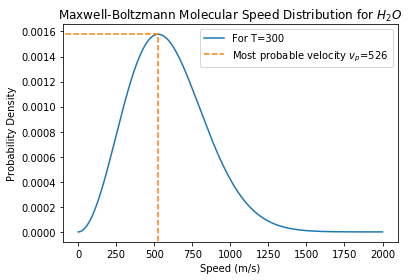

In [27]:
#Plot of Maxwell-Boltzmann Distribution

T=300 #Room temperature is 293-298 K
k=1.380649*10**(-23) #Boltzmann constant
m=2.9915*10**(-23)*10**(-3) #mass of a water molecule in kg


x=np.linspace(0,2000,2000)
y=np.sqrt(2/np.pi)*(m/(k*T))**(3/2)*x**2*np.exp(-m*x**2/(2*k*T)) #Maxwell- Boltzmann Distribution 

v_p=int(np.sqrt(2*8.3144621*T/0.01801528)) #Maximum value for the PDF (most probable velocity)

#Plotting the distribution function
plt.plot(x,y)
plt.title(r'Maxwell-Boltzmann Molecular Speed Distribution for $H_2O$')
plt.ylabel('Probability Density')
plt.xlabel('Speed (m/s)')

#Showing the maximum value v_p
xlim,ylim = plt.xlim(), plt.ylim()
plt.plot([x[v_p], x[v_p], xlim[0]], [xlim[0], y[v_p], y[v_p]],
          linestyle="--")
plt.xlim(xlim)
plt.ylim(ylim)
plt.legend(['For T='+str(T),r'Most probable velocity $v_p$='+str(v_p)])

plt.savefig('distributionplot.pdf')